In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0,7.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray' 

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
data = pd.read_csv("fake_or_real_detection.csv")
data.head()

,title,text,subject,target
0,trump calls racist policy forced every state,donald trump calling one controversial raciall...,News,fake
1,republican exdefense secretary cohen backs hil...,washington reuters former republican us defens...,politicsNews,true
2,teacher quits job 5th 6th grade muslim student...,never young commit jihad teachers primary scho...,politics,fake
3,laura ingraham rips press…crowd goes wild “do ...,laura ingraham reminds never trump people bett...,politics,fake
4,germanys merkel suffers state vote setback coa...,berlinhanover reuters germany social democrats...,worldnews,true


# Modeling

In [3]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
# Split the data
data['text'] = data['text'].fillna(' ')
X_train, X_test, y_train, y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state = 42)

In [12]:
# Logistic Regression
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

#Fitting the model
model = pipe.fit(X_train, y_train)

#Accuracy
prediction = model.predict(X_train)
print("accuracy: {}%".format(round(accuracy_score(y_train, prediction)*100, 2)))

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))

accuracy: 99.36%
accuracy: 98.89%


Confusion matrix, without normalization


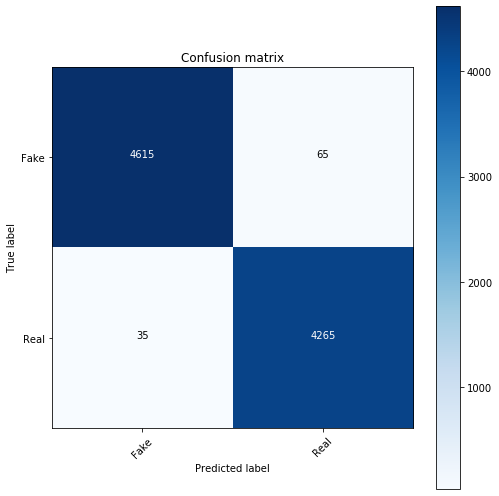

In [6]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [13]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
model = pipe.fit(X_train, y_train)

prediction = model.predict(X_train)
print("accuracy: {}%".format(round(accuracy_score(y_train, prediction)*100,2)))

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 100.0%
accuracy: 99.69%


Confusion matrix, without normalization


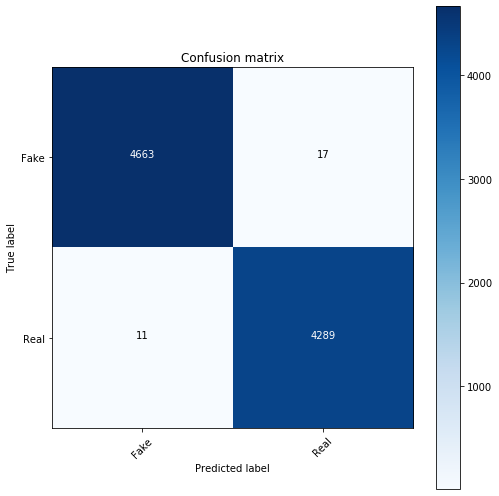

In [8]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real']);